<a href="https://colab.research.google.com/github/Matthieu-Romain/ToyStore-ecommerce/blob/main/Certification_Data_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

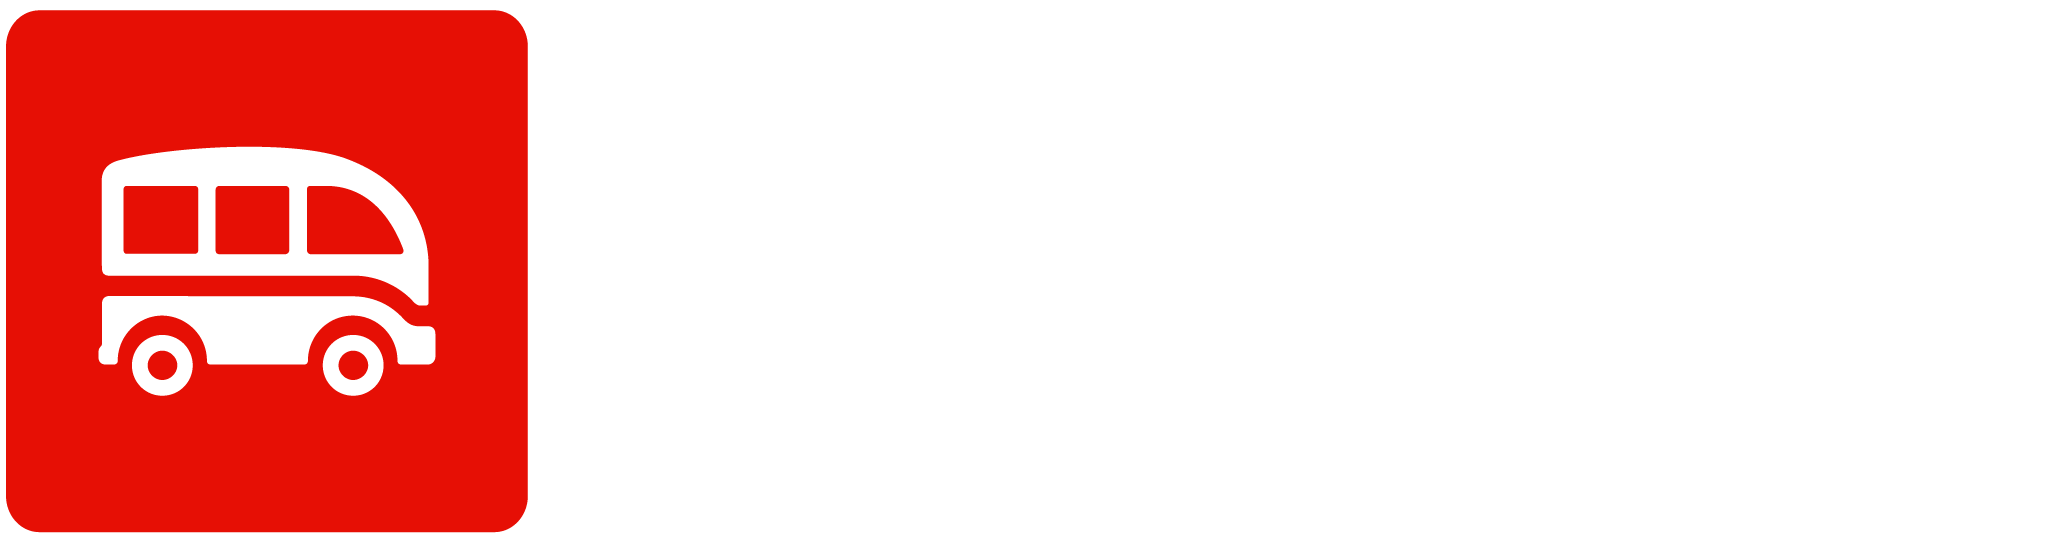

In this notebook, we will work on Airbnb data.

The objective will be to load the data, clean and format it, before exploring and analyzing it.

You will be a Data Analyst trying to answer the following problems:    

* Is the average price difference between "entire home" and "private room" properties significant?
* Does a host's response time affect its final review score?
* Price trend analysis: are hosts taking advantage of the calendar to set their prices?

At the end of the notebook, we will ask you to answer questions about the project management of a Data Analyst.

Finally, you will make a 5-minute Loom video to present your work.

# Data Description

Data collected on the Airbnb website on September 9, 2022.

Detailed description:
- **calendar**: Table gathering reservation calendar information. Contains prices and availability for coming year.
    - *listing_id*: id of the accommodation
    - *date*: day of possible reservation
    - *available*: availability/unavailability of the accommodation
    - *price*: price according to the day
- **listing**: Table with an overview of the accommodations.
    - *id* : Airbnb's unique identifier for the listing (accomodation)
    - *host_response_time* : The average response time of the host for this accommodation
    - *room_type* : Entire home/apt | Private room | Shared room
    - *review_scores_value* : The average reviews score that the listing has

# 1) Import of data

The files can be downloaded in csv format via these links:


*   [listing](https://drive.google.com/file/d/19MV9XLOYDld3fw79PzIseX3wEmK5P2vD/view?usp=sharing)
*   [calendar](https://drive.google.com/file/d/1w9SWUrRblQhxaa1hkwvQHE943at1iZM5/view?usp=sharing)



You can then import them into your Google Colab environment to start working with

In [1]:
import pandas as pd

Load the files "calendar.csv" into a `calendar` variable

In [2]:
calendar = pd.read_csv("calendar.csv")

Displays the first 10 elements of `calendar`

In [3]:
calendar.head(10)

,listing_id,date,available,price
0,130420,2022-09-10,f,$220.00
1,130420,2022-09-11,f,$210.00
2,130420,2022-09-12,t,$210.00
3,130420,2022-09-13,t,$210.00
4,130420,2022-09-14,t,$210.00
5,130420,2022-09-15,f,$210.00
6,130420,2022-09-16,f,$220.00
7,130420,2022-09-17,f,$220.00
8,130420,2022-09-18,f,$210.00
9,130420,2022-09-19,f,$210.00


In [4]:
calendar.describe()

,listing_id
count,72101.00000
mean,388082.92738
std,225915.25176
min,5396.00000
25%,193632.00000
50%,422295.00000
75%,566867.00000
max,788259.00000


Load the file "listing.csv" into a `listing` variable

In [2]:

from google.colab import files
uploaded = files.upload()

Saving listing.csv to listing (2).csv


In [7]:
import io
listing = pd.read_csv(io.BytesIO(uploaded['listing.csv']))


NameError: ignored

In [8]:
# TO DO
listing = pd.read_csv("listing.csv")

NameError: ignored

Displays the first 10 elements of `listing`

In [9]:
# TO DO
listing.head(10)

NameError: ignored

# 2) Cleaning and formatting

## Date

For the `calendar` dataset, the "date" column is formatted as a "string".

Using the `to_datetime` function, transforms the "date" column to datetime format

In [ ]:
calendar.dtypes

In [ ]:
# Convert the date format which is a string to datetime
calendar["date"]= pd.to_datetime(calendar["date"])
#data["Date"]= pd.to_datetime(data["Date"])

Create a new column "month" in `calendar` that corresponds to the month of the year.

Use `dt.month` to extract the month from a datetime

In [ ]:
#creat new "month"
column calendar['month'] = calendar['date'].dt.month

In [ ]:
calendar.describe()

In [ ]:
calendar.dtypes

## Price


In `calendar`, the "price" column is in a particular format :
```
$13,700.00
```
We will try to transform them into `Float` type.

Let's start with a little exercise :

Put the thongs below in the right format. You can use the function `replace`, to replace the commas and the dollar and the function `float` to cast in float.

In [ ]:
price_1 = "$200.00"
price_2 = "$13,700.00"

# TO DO : transform price_1 and price_2 into a float format*
# Remove commas and dollar sign and cast to float format
price_1 = float(price_1.replace(',', '').replace('$', ''))
price_2 = float(price_2.replace(',', '').replace('$', ''))

print(price_1)
print(price_2)

Create a function `clean_price`, which takes as input a variable "price" in the format seen above, and returns the price in float format.

In [ ]:
# Remove commas and dollar sign, then cast to float
def clean_price(price):
    cleaned_price = float(price.replace(',', '').replace('$', ''))
    return cleaned_price

print(price_1)
print(price_2)

In [ ]:
# On teste la fonction
price_1 = "$200.00"
price_2 = "$13,700.00"

cleaned_price_1 = clean_price(price_1)
cleaned_price_2 = clean_price(price_2)

print(cleaned_price_1)
print(cleaned_price_2)

In `calendar`, set  the "price" column in the right format.

Use the `apply` function with your `clean_price` function

In [ ]:

# Applying the clean price function to the price column
calendar['price'] = calendar['price'].apply(clean_price)

# 3) Data exploration

The objective of this part is to discover the data you have available.

These questions are there only to guide your exploration of the data.

Don't get stuck on one question for too long.

The graphics will be made with this library :

In [ ]:
import plotly.express as px

For `calendar` : **display the oldest and the most recent reservation date**.

In [ ]:
import pandas as pd
import plotly.express as px

# Find the oldest and most recent dates
oldest_date = calendar['date'].min()
most_recent_date = calendar['date'].max()

# Create a DataFrame with the oldest and most recent dates
date_range_df = pd.DataFrame({'Date': ['Oldest', 'Most Recent'], 'Reservation Date': [oldest_date, most_recent_date]})

# Create a plot using Plotly Express
fig = px.bar(date_range_df, x='Date', y='Reservation Date', title='Oldest and Most Recent Reservation Dates')
fig.show()

In [ ]:
# TO DO

For `calendar` : **display the number of unique "listing_id"**

In [ ]:
calendar = calendar["listing_id"].unique()
print(calendar)
print(len(calendar)



In [ ]:
from numpy import mean
# TO DO
calendar['listing_id'].value_counts()

For `calendar` : **display the descriptive statistics of price column (mean, standard deviation etc...)**

In [ ]:
# TO DO
descriptive_statistics = calendar['price'].describe()

# Display the descriptive statistics
print(descriptive_statistics)


# Create a bar chart using Plotly Express
fig = px.bar(
    x=price_statistics.index,
    y=price_statistics.values,
    text=price_statistics.values.round(2),
    labels={'x': 'Statistic', 'y': 'Value'},
    title='Descriptive Statistics of Price Column'
)

fig.update_traces(texttemplate='%{text}', textposition='outside')

# Show the plot
fig.show()

For `calendar`: **display the percentage of days an accommodation is available on average**.

In [ ]:
df = calendar['available'].astype(bool)
print(df)

In [ ]:
#mask creation for conditional filter
mask = calendar['available'] == True
filtered_df = calendar.loc[mask]
print(filtered_df)


In [ ]:
= len(calendar['available'].unique())

In [ ]:
average_percentage_availability = (calendar['available'] * 100).mean()

In [ ]:
# Calculate the total number of available days for each listing
calendar['total_available'] = calendar.groupby('listing_id,'date'')['available'].transform('sum')

# Calculate the percentage availability for each row
calendar['percentage_availability'] = (calendar['available'] / calendar['total_available']) * 100

# Calculate the average percentage availability
average_percentage_availability = calendar['percentage_availability'].mean()

In [ ]:
percentage_availability = calendar.groupby(['listing id', 'date'])['available'].mean() * 100

# Reset the index to get a DataFrame with 'listing id', 'date', and percentage_occurrence columns
percentage_availability = percentage_occurrence.reset_index()

# Rename the 'available' column to 'percentage_occurrence'
percentage_ availability = percentage_occurrence.rename(columns={'available': 'percentage_occurrence'})

# Display the resulting DataFrame
print(percentage_availability)

In [ ]:
#Display percentage of availaility
calendar [percentage avaibility] = calendar.groupby ["listing"]  where available = t/ len [available]

For `listing`: **Display the number of accommodations by room_type as a bar graph**

Use the function `px.bar`

In [ ]:
fig = px.bar(calendar,x="")
fig.show()

# 4) Is the average review score different between "entire home" and "private room" properties? Is it significant?

To answer this question, we propose to perform a z-test.

**Why can we do this test? Why not perform a t-test? You can use a line of code to answer**

The population is large enough to do a z test, variance is known.

In [ ]:
from statsmodels.stats.weightstats import ztest
home = listing.csv


With the variable `listing`, create two Dataframe:

*   `home` : listing with `room_type` "Entire home/apt"
*   `private_room` : listing with `room_type` "Private room"



In [1]:
# Create 'home' DataFrame with listings having room_type "Entire home/apt"
home = calendar[calendar['room_type'] == 'Entire home/apt']

# Create 'private_room' DataFrame with listings having room_type "Private room"
private_room = calendar[calendar['room_type'] == 'Private room']

NameError: ignored

Calculate and display the p-value to answer the problem. We will use the `ztest` function.

In [ ]:
import statsmodels.api as sm
import statsmodels.stats.weightstats as st

# Calculate the sample means and standard errors for each group
mean_home = home_df['review_score'].mean()
mean_private_room = private_room_df['review_score'].mean()
std_home = home_df['review_score'].std()
std_private_room = private_room_df['review_score'].std()

# Perform the Z-test
z_stat, p_value = st.ztest(x1=home_df['review_score'], x2=private_room_df['review_score'], value=0, alternative='two-sided')

print(f"Mean review score for Entire home/apt: {mean_home:.2f}")
print(f"Mean review score for Private room: {mean_private_room:.2f}")
print(f"Z-statistic: {z_stat:.2f}")
print(f"P-value: {p_value:.4f}")

**Taking a threshold at 5%, answer the problem.**

Enter your response here

# 5) Does a host's response time affect its final review score?

Airbnb doesn't like it much when hosts take time to respond. It's a real loss of revenue. <br>
We wonder if a host's response time affects the final rating they receive from their guests.

With `listing` : **calculate the proportion of accommodations that have a host with the longest response time, i.e. "a few days or more "**.

We propose to calculate the correlation between `host_response_time` and `review_scores_value`, to see if the two variables are correlated. <br>
First, **create a new column "host_response_time_num", which contains the value of host_response_time in numerical values** with the following rule:

*   1 : within an hour
*   2 : within a few hours
*   3 : within a day
*   4 : a few days or more

Use the function `replace`



In [ ]:
#mapping of response times to numerical values
response_time_mapping = {
    'within an hour': 1,
    'within a few hours': 2,
    'within a day': 3,
    'a few days or more': 4
}

# Create the new column using the mapping
listing['host_response_time_num'] = listing['host_response_time'].replace(response_time_mapping)

# Display the updated DataFrame
print(listing[['host_response_time', 'host_response_time_num']])

Using the `corr()` function, **calculate the correlation between `host_response_time` and `review_scores_value`.**

In [ ]:
# Calculate the correlation between host_response_time_num and review_scores_value
correlation = listing['host_response_time_num'].corr(listing['review_scores_value'])

# Display the correlation coefficient
print(f"Correlation between host_response_time_num and review_scores_value:{correlation:.2f}")

Using the `px.box` method, **create box plot to represent the two variables.**

We expect "host_response_time_num" on the abscissa and "review_scores_value" on the ordinate

In [ ]:
# # Create a box plot
fig = px.box(listing, x='host_response_time_num', y='review_scores_value',
             labels={'host_response_time_num': 'Host Response Time', 'review_scores_value': 'Review Scores Value'},
             title='Box Plot of Host Response Time vs. Review Scores Value')

# Show the plot
fig.show()

**Conclusion: does the response time of a host influence the final score he will receive from his customers?**

Yes the shorter the better the score

# 6) Pricing trend analysis: are hosting companies taking advantage of the calendar to set their prices?

We wonder if hosts take advantage of the calendar to set their prices. For example higher rates during national holidays.

We assume that Airbnb hosts set their own prices.

For `calendar` : **put the "date" column in index**

Use the function `set_index`

In [ ]:
# Set the "date" column as indew of calendar dataframe
calendar.set_index('date', inplace=True)

With the `resample` function, **calculate the average price per day**.

The result will be stored in a `mean_price` variable

In [10]:
# resample by day mean price
mean_price = calendar['price'].resample('D').mean()

**Display graphically the evolution of the average daily price**

Use the variable `mean_price` and the function `px.line`


In [ ]:
# fig = px.line(x=mean_price.index, y=mean_price.values, labels={'x': 'Date', 'y': 'Average Price'},
              title='Average Price Over Time')

fig.show()

**How does the average daily price evolve during the Christmas holidays?**

Enter your response here

**Calculate and display the percentage of properties that never change the price of their home.**

This can be done by calculating the standard deviation of prices using the function `std`

In [ ]:
# # Calculate the standard deviation of prices for each property
price_std_by_property = listing.groupby('id')['price'].std()

# Count the properties where the standard deviation is zero (price never changes)
properties_with_constant_price = (price_std_by_property == 0).sum()

# Calculate the total number of properties
total_properties = len(listing['id'].unique())

# Calculate the percentage of properties that never change the price
percentage_constant_price = (properties_with_constant_price / total_propert

**Using the previous questions, do you think hosts take advantage of the calendar to set their prices?**

Enter your response here

# Data Analyst Team

After having answered specific problems, we propose to study the following topic more globally: **Analyze the trend of housing prices on Airbnb.**

1. **Project organization**: Explain in detail how you would organize this analysis work in a team of 4 data analysts (division of tasks, process, work methods, analysis review, time spent etc.)

Enter your response here

2. **Project monitoring**: Explain in a few lines what you would put in place to monitor the progress of the analysis project, the bottlenecks and the solutions brought to it (who are the stakeholders to contact to get the data, how do you report problems in the data...)

In [ ]:
 jira solution

Enter your response here

3. **Project history**: What would you put in place to keep a history of exchanges between team members during your meetings to document the work?

Enter your response here

4. **Project Collaboration**: What tools would you use to foster collaboration among your team of data analysts? Describe in a few lines how you would use these tools.

Enter your response here

In [ ]:
 cithub for versionning notion for documentation of code slack for communication

# Loom video

Make a video explaining your notebook with your analyses. Imagine that you are presenting the results of your analyses to your hierarchy. Share your screen so that people can see your notebook and your face.
The video should be 5 min maximum.

Copy the public sharing url in your google form.